# Project Fake or Factual? A Comparative Analysis of Model Performance on News Article Classifications

## Objective:
Our project aims to develop and compare different classification models for distinguishing between fake and factual news articles. We will evaluate the performance of Support Vector Machine (SVM), Long Short-Term Memory (LSTM), and Random Forest models based on accuracy, F1 score, and precision.

\

## Importance:
Differentiating between fake and factual news is crucial to prevent the spread of misinformation and to uphold the integrity of journalism. Misleading information can influence public opinion and erode trust in legitimate news sources.

\

## Dataset:
We will use the [WELFake dataset](https://huggingface.co/datasets/davanstrien/WELFake?row=12) obtained from Hugging Face, which contains labeled examples of fake and factual news titles and text.

\

## Project Process:
- **Import Data**: Obtain the WELFake dataset from Hugging Face.
- **Data Cleaning**: Preprocess the data to ensure consistency.

- **Data Preprocessing**: Prepare the data for model training by converting text into numerical features.

- **SVM Training**: Train a Support Vector Machine model to classify news articles.

- **Random Forest Training**: Train a Random Forest model for comparison.

- **LSTM Training**: Implement a Long Short-Term Memory model for sequence classification.

- **Model Evaluation**: Assess the performance of each model using accuracy, F1 score, and precision metrics.

- **Comparison**: Compare the strengths and weaknesses of SVM, Random Forest, and LSTM models.

- **Conclusion**: Summarize findings and provide insights into the effectiveness of each model for news classification.

\

Through this comparative analysis, we aim to identify the most effective model for distinguishing between fake and factual news articles, contributing to efforts to combat misinformation and uphold journalistic standards.

# Import Libraries

Libraries used for this project are:

- Pandas: For data manipulation and analysis
- Numpy: For numerical computations and array operations
- Matplotlib: For data visualization
- NLTK (Natural Language Toolkit): For text processing tasks such as tokenization and stop-word removal
- Scikit-learn: For machine learning tasks including feature extraction, model training, and evaluation
  - TfidfVectorizer: For converting textual data into numerical features
  - SVM (Support Vector Machine): For classification tasks
  - Random Forest: For classification tasks using ensemble learning
  - Train Test Split: For spliting datasets into train and test data
  - Metrics such as accuracy, precision, and F1-score were computed using functions provided by Scikit-learn
- TensorFlow: For building and training deep learning models
  - LSTM (Long Short-Term Memory): For sequential data processing tasks
- NLTK's data resources were downloaded using the nltk.download() function to enable text processing functionalities.

In [ ]:
#imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, precision_score, f1_score

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Import Dataset

We got this dataset from Hugging Face, a platform that provides a wide range of datasets and models for natural language processing tasks.

\

- The Word Embedding over Linguistic Features for Fake News Detection (WELFake) dataset, comprises 72,134 news articles, categorizing 35,028 as real and 37,106 as fake news.

- They combined four well-known news datasets (Kaggle, McIntire, Reuters, and BuzzFeed Political) to create a larger and more diverse dataset. This prevents classifiers from over-fitting for better ML training.

- Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (1 = fake and 0 = real).

\

Out of the **78,098** data entries in the CSV file, only **72,134** entries are accessible through the data frame.

In [ ]:
#mounts drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loads and displays csv as dataframe
df = pd.read_csv('/content/drive/MyDrive/fake_real_news.csv')
df.head()

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last n...,1
2,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
3,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1
4,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1


# Data Cleaning
The following step were taken to clean the data to prepare it for training:

- Data inspection
- Handling missing values
- Removing special characters, stop words, and converting text to lowercase.

In [ ]:
#finds missing value in any column
df[df.isna().any(axis=1)]

,title,text,label
37161,NaN,we the people against tyranny seven principle...,1


In [ ]:
#drops missing values
df = df.dropna(axis = 0)

In [ ]:
#checks for missing values in the dataset
df.isna().sum()


title    0
text     0
label    0
dtype: int64

In [ ]:
df.shape

(70327, 3)

# Data Preprocessing
In our preprocessing step, we perform the following tasks:
- Tokenization: The text data was tokenized into individual words or phrases to facilitate further processing.
- Data Splitting: The dataset was split into training, validation and testing sets to evaluate the performance of the models accurately.
- Vecotorization: The tokenized text data was converted into numerical vectors using techniques like TF-IDF or word embeddings, making it suitable for machine learning algorithms.

In [ ]:
# Tokenize the 'title' and 'text' columns using word_tokenize function from NLTK
df['title'] = df['title'].apply(word_tokenize)
df['text'] = df['text'].apply(word_tokenize)

In [ ]:
# split the dataset into training and testing sets
X = df.drop(columns = 'label')
y = df['label']

# further split the training set into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,  random_state=42)

In [ ]:
# initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# convert text data into strings
X_train_text = [' '.join(words) for words in X_train['text']]
X_val_text = [' '.join(words) for words in X_val['text']]

In [ ]:
# vectorize the text data using TF-IDF vectorizer
X_train_vec = vectorizer.fit_transform(X_train_text) # fit-transform on training data
X_val_vec = vectorizer.transform(X_val_text) # transform validation data

In [ ]:
# prints the vocabulary learned by the vectorizer
vectorizer.vocabulary_

{'posted': 184866,
 'november': 163964,
 '2016': 5405,
 'joandarc': 126501,
 'comments': 56739,
 'yesterday': 260705,
 'october': 166032,
 '31': 9548,
 'hallows': 104057,
 'eve': 83588,
 'halloween': 104049,
 'evening': 83600,
 'holy': 110559,
 'ones': 167932,
 'explained': 85153,
 'reclaim': 195416,
 'word': 257833,
 'hallow': 104046,
 'make': 143170,
 'sacred': 205285,
 'sanctify': 206796,
 'consecrate': 58674,
 'venerate': 248624,
 'een': 78311,
 'means': 147428,
 'saint': 206175,
 'hallowed': 104048,
 'saints': 206196,
 'words': 257866,
 'day': 66253,
 'today': 236998,
 'saw': 207801,
 'angel': 24275,
 'come': 56372,
 'east': 77544,
 'holding': 110338,
 'seal': 209921,
 'living': 139405,
 'god': 99067,
 'cried': 62756,
 'loud': 140687,
 'voice': 250636,
 'angels': 24321,
 'given': 98386,
 'power': 185449,
 'damage': 65265,
 'land': 134243,
 'sea': 209866,
 'trees': 239501,
 'foreheads': 92121,
 'servants': 212256,
 'heard': 106549,
 'number': 164673,
 'marked': 144894,
 'fortyfour'

In [ ]:
# print the TF-IDF vectors for the training data
print(X_train_vec)

  (0, 126499)	0.02870606967110135
  (0, 1603)	0.015034881472216724
  (0, 1138)	0.014784551322385181
  (0, 250765)	0.024333519968987836
  (0, 3340)	0.016163049431247207
  (0, 125086)	0.014417922441608113
  (0, 4519)	0.037254295768384585
  (0, 65077)	0.0141667769642191
  (0, 92312)	0.022432046253590396
  (0, 99533)	0.01598399882863145
  (0, 193687)	0.03572379708184373
  (0, 4308)	0.023333377561690745
  (0, 186941)	0.01286660825614433
  (0, 116849)	0.03247803760771328
  (0, 93280)	0.020056607672209917
  (0, 206775)	0.01708936197669837
  (0, 258863)	0.027442949574544784
  (0, 153923)	0.04096643110079084
  (0, 124920)	0.014898021945193107
  (0, 48646)	0.04254958921924252
  (0, 48578)	0.036608877319691736
  (0, 220238)	0.015376482772289727
  (0, 171768)	0.0164252732843944
  (0, 92720)	0.03874676187095079
  (0, 190354)	0.01466507191576041
  :	:
  (45007, 214694)	0.03903359049794803
  (45007, 220668)	0.04019396912479264
  (45007, 159202)	0.03802213675551254
  (45007, 168710)	0.0384388032630596

# SVM Model Training

- Support Vector Machine (SVM) training involves finding the optimal hyperplane that best separates the data points of different classes in the feature space.

- The objective of SVM is to maximize the margin between the support vectors (data points closest to the decision boundary) of different classes while minimizing the classification error.

In [ ]:
# initialize SVM classifier with a linear kernel
svm_classifier = svm.SVC(kernel='linear')

# train the SVM classifier on the TF-IDF vectors of the training data
svm_classifier.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
dump(svm_classifier, '/content/drive/MyDrive/svm_model.joblib')

['svm_model.joblib']

In [ ]:
# load previous svm classifier
svm_classifier = load('/content/drive/MyDrive/svm_model.joblib')

# SVM Evaluation

The performance of the Support Vector Machine (SVM) classifier was assessed using the validation set. The following metrics were calculated to evaluate the model's performance:

- **Validation Accuracy**: The accuracy of the SVM classifier on the validation set was determined to assess the overall correctness of the predictions.

  \
  **Accuracy = Number of Correct Predictions / Total Number of Predictions**
  
  \

- **F1 Score on Validation Set**: The F1 score, a harmonic mean of precision and recall, was computed to evaluate the classifier's ability to balance between precision and recall on the validation set.

  \
  **F1 = 2 * (Precision * Recall) / (Precision + Recall)**

  \

- **Precision on Validation Set**: Precision, representing the proportion of correctly identified positive cases among all predicted positive cases, was calculated to measure the classifier's exactness in predicting positive instances on the validation set.

  \
  **Precision = True Positives / (True Positives + False Positives)**

  \
  
- **Confusion Matrix**: The confusion matrix provides a summary of the model's predictions compared to the actual labels in  the dataset.

- **Receiver Operating Characteristic (ROC) Curve**: It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** for various threshold values.

In [ ]:
# evaluate the SVM classifier on the validation set
val_accuracy = svm_classifier.score(X_val_vec, y_val)
y_val_pred = svm_classifier.predict(X_val_vec)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("F1 Score on Validation Set:", f1)
print("Precision on Validation Set:", precision)

Validation Accuracy: 0.9624100239936018
F1 Score on Validation Set: 0.9623765898781463
Precision on Validation Set: 0.95837023914969


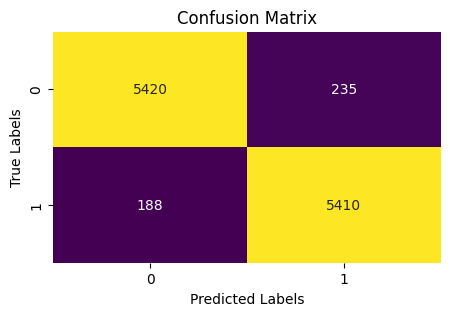

In [ ]:
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)


# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

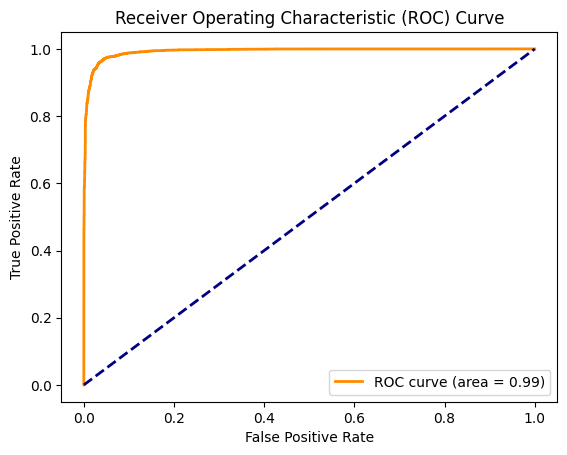

In [ ]:
# ROC Curve
y_val_score = svm_classifier.decision_function(X_val_vec)
fpr, tpr, _ = roc_curve(y_val, y_val_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()